# Plotting nsi complex network measures

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import scipy.sparse

### Configurations

In [22]:
perc95 = 1
perc99 = 0
surr100 = 0
surr1000 = 1

In [23]:
if surr100:
    surr = '100'
elif surr1000:
    surr = '1000'

In [24]:
if perc95:
    perc = '95.0'
elif perc99:
    perc = '99.5'

In [25]:
taumax2 = 0
taumax8 = 0
taumax16 = 1

In [26]:
file_path = '../data/'

nsi_bc = 'nsi_betweenness.npz'
nsi_ec_left = 'nsi_eigenvector_centrality_left.npz'
nsi_ec = 'nsi_eigenvector_centrality.npz'
nsi_local_cyclemotif = 'nsi_local_cyclemotif_clustering.npz'
nsi_local_inmotif = 'nsi_local_inmotif_clustering.npz'
nsi_local_midmotif = 'nsi_local_midmotif_clustering.npz'
nsi_local_outmotif = 'nsi_local_outmotif_clustering.npz'
nsi_indegree = 'nsi_indegree.npz'
nsi_outdegree = 'nsi_outdegree.npz'

if taumax2:
    data_path = file_path + 'NSI_ComplNet_Measures/taumax2/'
    taumax = 2
    
elif taumax8:
    data_path = file_path + 'NSI_ComplNet_Measures/taumax8/'
    taumax = 8

elif taumax16:
    data_path = file_path + 'NSI_ComplNet_Measures/taumax16/'
    taumax = 16
    
file_lats_unreduced = file_path + 'lats.4dx4dy_ndjfm.txt'
file_lons_unreduced = file_path + 'lons.4dx4dy_ndjfm.txt'

In [27]:
lat_unreduced = np.loadtxt(file_lats_unreduced)
lon_unreduced = np.loadtxt(file_lons_unreduced)

### NSI betweenness centrality

In [28]:
bc = np.load(data_path+nsi_bc)['arr_0']

FileNotFoundError: [Errno 2] No such file or directory: '../data/NSI_ComplNet_Measures/taumax16/nsi_betweenness.npz'

In [ ]:
#nroming betweenness by maximum theoratical bc value of a graph (star graph) N²-3N+2
bc = bc/(25600*25600-3*25600+2)

In [ ]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = [0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012, 0.00014, 0.00016, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00028, 0.00030, 0.00032, 0.00034, 0.00036, 0.00038, 0.00040, 0.00042, 0.00044, 0.00046, 0.00048, 0.00050, 0.00052, 0.00054, 0.00056]
nsi_bc_map = ax.contourf(lon_unreduced, lat_unreduced, bc.reshape(80,320), levels=clevs, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(nsi_bc_map, ax=ax, shrink=0.4)
cmap.set_label('Betweenness Centrality',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_bc_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

### NSI eigenvector centrality

In [29]:
ec = np.load(data_path+nsi_ec)['arr_0']
ec_left = np.load(data_path+nsi_ec_left)['arr_0']

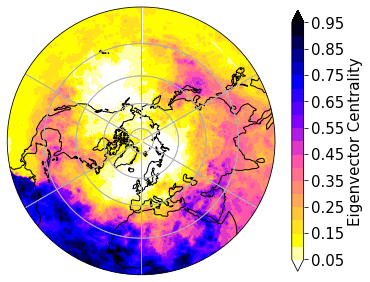

In [30]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

#clevs = np.linspace(0.002,0.018,33).tolist()
ec_map = ax.contourf(lon_unreduced, lat_unreduced, ec.reshape(80,320), levels=20, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree()) 

cmap = plt.colorbar(ec_map, ax=ax, shrink=0.4)
cmap.set_label('Eigenvector Centrality',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_ec_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

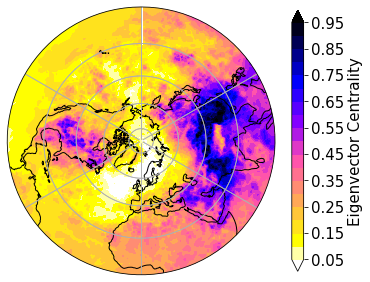

In [31]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

#clevs = np.linspace(0.002,0.018,33).tolist()
ec_map = ax.contourf(lon_unreduced, lat_unreduced, ec_left.reshape(80,320), levels=20, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree()) 

cmap = plt.colorbar(ec_map, ax=ax, shrink=0.4)
cmap.set_label('Eigenvector Centrality',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_ec_left_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

### NSI degree

In [32]:
indeg = np.load(data_path+nsi_indegree)['arr_0']
outdeg = np.load(data_path+nsi_outdegree)['arr_0']
deg = indeg + outdeg

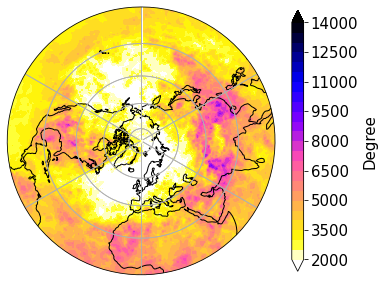

In [33]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = np.linspace(2000,14000, 25).tolist()
in_and_out_degree_map = ax.contourf(lon_unreduced, lat_unreduced, deg.reshape(80,320), levels=clevs, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(in_and_out_degree_map, ax=ax, shrink=0.4)
cmap.set_label('Degree',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_in_outdegree_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

### NSI local clustering

In [34]:
cyclemotif = np.load(data_path+nsi_local_cyclemotif)['arr_0']
inmotif = np.load(data_path+nsi_local_inmotif)['arr_0']
midmotif = np.load(data_path+nsi_local_midmotif)['arr_0']
outmotif = np.load(data_path+nsi_local_outmotif)['arr_0']

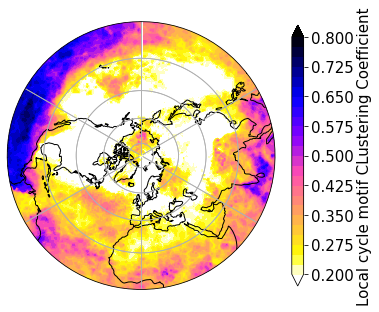

In [35]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = np.linspace(0.2,0.8, 25).tolist()
cyclemotif_map = ax.contourf(lon_unreduced, lat_unreduced, cyclemotif.reshape(80,320), levels=clevs, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(cyclemotif_map, ax=ax, shrink=0.4)
cmap.set_label('Local cycle motif CLustering Coefficient',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_cyclemotif_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

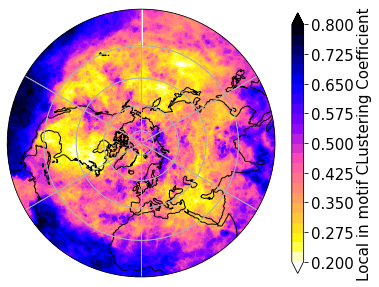

In [36]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = np.linspace(0.2,0.8, 25).tolist()
inmotif_map = ax.contourf(lon_unreduced, lat_unreduced, inmotif.reshape(80,320), levels=clevs, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(inmotif_map, ax=ax, shrink=0.4)
cmap.set_label('Local in motif CLustering Coefficient',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_inmotif_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

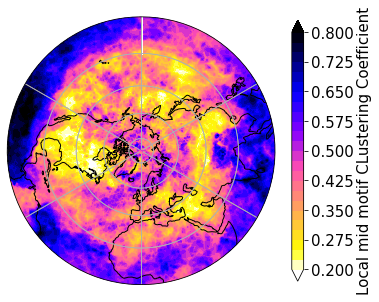

In [37]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = np.linspace(0.2,0.8, 25).tolist()
midmotif_map = ax.contourf(lon_unreduced, lat_unreduced, midmotif.reshape(80,320), levels=clevs, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(midmotif_map, ax=ax, shrink=0.4)
cmap.set_label('Local mid motif CLustering Coefficient',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_midmotif_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

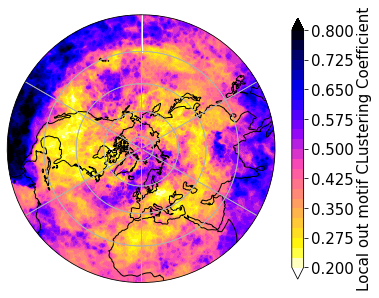

In [38]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = np.linspace(0.2,0.8, 25).tolist()
outmotif_map = ax.contourf(lon_unreduced, lat_unreduced, outmotif.reshape(80,320), levels=clevs, cmap=plt.cm.gnuplot2_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(outmotif_map, ax=ax, shrink=0.4)
cmap.set_label('Local out motif CLustering Coefficient',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(file_path + 'nsi_outmotif_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)